# More DFA Intersection
The point of this is to show how human-directed layout can be visually superior to machine-directed layout.

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 9.11 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eq

L(dfaD1) = { w | w has exactly two 0's}

In [2]:
dfaD1 = md2mc('''
  DFA
  I : 0 -> S1
  I : 1 -> I
  S1: 0 -> F
  S1: 1 -> S1
  F : 0 -> S2
  F : 1 -> F
  S2: 0|1 -> S2
''')

Generating LALR tables


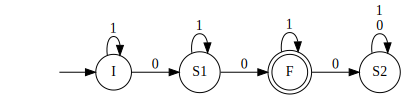

In [3]:
dotObj_dfa(dfaD1, FuseEdges=True)

L(dfaD2) = { w | w has at least two 1's}

In [4]:
dfaD2 = md2mc('''
  DFA
  I : 0 -> I
  I : 1 -> S1
  S1: 0 -> S1
  S1: 1 -> F
  F : 0|1 -> F
''')

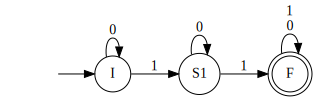

In [5]:
dotObj_dfa(dfaD2, FuseEdges=True)

In [6]:
dfaD3 = intersect_dfa(dfaD1, dfaD2)

In [7]:
len(dfaD3["Q"])

12

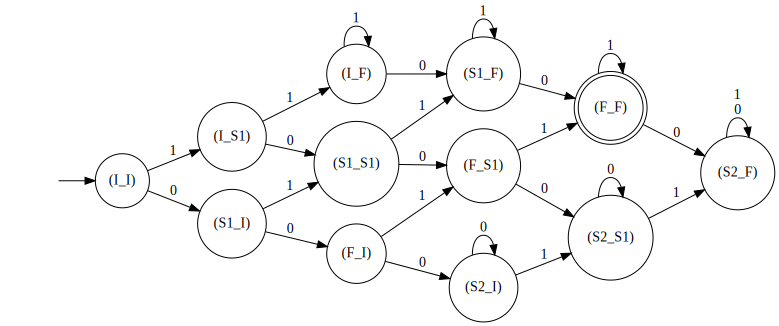

In [8]:
dotObj_dfa(dfaD3, FuseEdges=True)

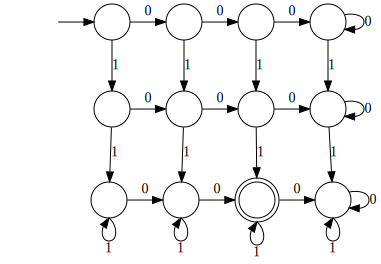

In [9]:
from graphviz import Source
Source('''
digraph {
  node [shape=circle]
   0 [shape=none label=""]
   1 [label=""]
   2 [label=""]
   3 [label=""]
   4 [label=""]
   5 [label=""]
   6 [label=""]
   7 [label=""]
   8 [label=""]
   9 [label=""]
  10 [label=""]
  11 [label="" shape=doublecircle]
  12 [label=""]
   0 ->  1 [label=""]
   1 ->  2 [label=0]
   1 ->  5 [label=1]
   2 ->  3 [label=0]
   2 ->  6 [label=1]
   3 ->  4 [label=0]
   3 ->  7 [label=1]
   4 ->  4 [label=0]
   4 ->  8 [label=1]
   5 ->  6 [label=0]
   5 ->  9 [label=1]
   6 ->  7 [label=0]
   6 -> 10 [label=1]
   7 ->  8 [label=0]
   7 -> 11 [label=1]
   8 ->  8 [label=0]
   8 -> 12 [label=1]
   9 -> 10 [label=0]
   9 ->  9 [label=1 headport=s tailport=s]
  10 -> 11 [label=0]
  10 -> 10 [label=1 headport=s tailport=s]
  11 -> 12 [label=0]
  11 -> 11 [label=1 headport=s tailport=s]
  12 -> 12 [label=0]
  12 -> 12 [label=1 headport=s tailport=s]
  {rank=same 0 1 2 3 4}
  {rank=same 5 6 7 8}
  {rank=same 9 10 11 12}
}
''')

Merging redundant states:

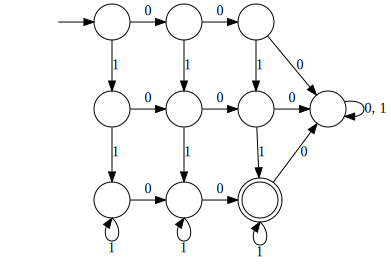

In [10]:
from graphviz import Source
Source('''
digraph {
  node [shape=circle]
   0 [shape=none label=""]
   1 [label=""]
   2 [label=""]
   3 [label=""]
   4812 [label=""]
   5 [label=""]
   6 [label=""]
   7 [label=""]
   9 [label=""]
  10 [label=""]
  11 [label="" shape=doublecircle]
   0 ->  1 [label=""]
   1 ->  2 [label=0]
   1 ->  5 [label=1]
   2 ->  3 [label=0]
   2 ->  6 [label=1]
   3 ->  4812 [label=0]
   3 ->  7 [label=1]
   5 ->  6 [label=0]
   5 ->  9 [label=1]
   6 ->  7 [label=0]
   6 -> 10 [label=1]
   7 -> 4812 [label=0]
   7 -> 11 [label=1]
   9 -> 10 [label=0]
   9 ->  9 [label=1 headport=s tailport=s]
  10 -> 11 [label=0]
  10 -> 10 [label=1 headport=s tailport=s]
  11 -> 4812 [label=0]
  11 -> 11 [label=1 headport=s tailport=s]
  4812 -> 4812 [label="0, 1"]
  {rank=same 0 1 2 3}
  {rank=same 5 6 7 4812}
  {rank=same 9 10 11}
}
''')

<mark> I have read and ran the code in this notebook </mark>